Hello, the flow of the work for this paper will be as follows:
1. read the data
2. scale the data
3. visualise the data
4. split the data
5. get feature importance (permutation)
6. visualize the best N imported features based on 50 runs
7. try from (1, 5, 10, 50) best features
    10, 20, 30, 40, 50 Freq. Random
8. the split should be (70, 30)
9. try up to 6 different classification models (RF, XGB, SVM, LR, KNNs, MD)
10. get the error bars and make comparisons

In [5]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 


### 1. read the data

In [2]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [3]:
df.shape

(503, 2078)

In [33]:
wavenumbers = np.float_(df.columns[4:])
type(wavenumbers[0])
wavelengths = (1/wavenumbers)*10**7

print(str(wavenumbers[0])+", "+ str(wavelengths[0]))
df.columns.values[4:] = np.round(wavelengths, 3)
df.head(4)

11995.49, 833.6466455309454


,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


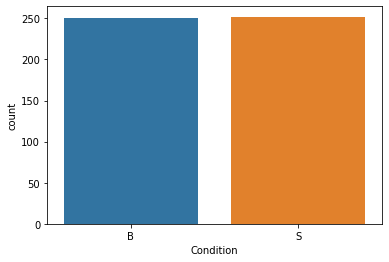

In [34]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


#### getting x, and y

In [36]:
df_input= df.iloc[:, 4: ]
df_input


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,-0.142162,-0.142754,-0.143336,-0.143301,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,-0.166405,-0.166787,-0.167322,-0.167319,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.005843,-0.005746,-0.005965,-0.006040,-0.005732,-0.005905,-0.006496,-0.006305,-0.005184,-0.004249,...,0.823532,0.825095,0.831351,0.830832,0.824308,0.817157,0.814575,0.815848,0.817096,0.823652
499,-0.010555,-0.009949,-0.010038,-0.010154,-0.010212,-0.010717,-0.010729,-0.009878,-0.009303,-0.009316,...,0.647229,0.642954,0.642807,0.646312,0.650215,0.651266,0.648941,0.648903,0.655380,0.662244
500,-0.054230,-0.054836,-0.055471,-0.055616,-0.055853,-0.056578,-0.056854,-0.055983,-0.054825,-0.054404,...,0.403613,0.404402,0.408775,0.410042,0.406809,0.405787,0.406463,0.405325,0.406469,0.410188
501,0.052804,0.052833,0.053037,0.053045,0.052818,0.052379,0.052130,0.052272,0.052694,0.053489,...,1.357465,1.369164,1.395378,1.412128,1.423115,1.429553,1.404126,1.366339,1.349845,1.325851


In [37]:
y = df['Condition']
y = y.map({'S': 1, 'B': 0})

### 2.scale the data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(df_input)

df_input_scaled = pd.DataFrame(input_scaled, columns = df_input.columns)
# df_input_scaled['class'] = df['Condition']

df_input_scaled

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481
3,-0.956279,-0.954154,-0.953762,-0.953193,-0.951764,-0.951278,-0.952847,-0.956050,-0.959460,-0.960475,...,-1.022473,-1.018331,-1.003590,-0.988366,-0.989729,-1.006131,-1.027455,-1.034726,-1.020874,-0.996992
4,-1.071554,-1.068693,-1.068226,-1.068877,-1.070526,-1.072038,-1.072885,-1.074952,-1.078072,-1.079284,...,-1.637289,-1.630079,-1.636046,-1.644734,-1.633950,-1.608915,-1.587258,-1.577930,-1.585577,-1.603032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.275430,-0.274320,-0.274200,-0.274479,-0.274608,-0.277242,-0.281107,-0.280976,-0.276278,-0.272611,...,-0.491406,-0.485925,-0.464286,-0.467758,-0.490807,-0.515450,-0.524820,-0.519023,-0.512824,-0.488398
499,-0.298707,-0.295062,-0.294296,-0.294798,-0.296765,-0.301067,-0.302066,-0.298652,-0.296644,-0.297677,...,-1.157046,-1.173071,-1.175726,-1.162370,-1.142283,-1.133218,-1.141321,-1.142113,-1.121310,-1.100813
500,-0.514468,-0.516540,-0.518424,-0.519333,-0.522529,-0.528154,-0.530454,-0.526756,-0.521762,-0.520717,...,-2.076827,-2.073034,-2.058804,-2.051791,-2.053137,-2.047367,-2.043846,-2.051221,-2.057879,-2.057166
501,0.014295,0.014717,0.016864,0.017340,0.015010,0.011359,0.009173,0.008830,0.009937,0.013005,...,1.524477,1.566631,1.663975,1.720487,1.749993,1.765076,1.669538,1.535575,1.491738,1.417050


### 4. split the data

In [39]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_scaled, y, test_size = 0.3, random_state=3, stratify=y) # train and valid sets

In [40]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


In [41]:
%store -r featOrdered
%store -r sorted_idx

In [42]:
print(featOrdered)

[1776.998 1569.395 1926.182 1032.925 1126.256 1008.81 1212.081 888.804
 1167.33 1140.625 874.415 1289.871 927.6 1952.29 1004.121 877.374 860.2
 1566.55 1026.788 989.557 924.293 2242.768 1479.818 1236.357 1077.573
 910.977 868.265 872.943 1606.345 1282.216 1430.817 2361.239 1337.792
 1006.069 929.928 878.563 2445.887 986.17 2306.62 857.071 895.249 1870.592
 1609.336 1353.859 1135.629 845.61 1403.704 1694.536 873.531 2374.213
 905.884 971.391 1683.533 2452.829 876.781 1170.492 1228.158 1332.977
 872.062 2022.34 923.963 953.527 889.719 1590.577 1306.774 850.883
 1030.871 997.937 1907.756 1697.866 1272.774 2490.529 1522.396 1107.966
 1658.759 1000.247 1382.005 1625.48 914.834 1523.291 987.296 994.111
 1108.44 1610.336 1559.014 927.268 1261.626 1111.767 1437.959 2302.522
 1000.633 2059.286 876.188 964.524 836.875 1700.092 1291.799 968.487
 1474.767 841.493 1076.231 852.282 1138.121 992.588 1548.77 2266.294
 903.36 1823.235 1733.048 1549.696 1103.721 1500.371 1001.406 972.119
 949.686 1241.0

### ML with diffrint features as an input

In [1]:
number_features = [2, 4, 6, 8, 10, 20, 50] # define the number features. 
# number_features = [3, 5] # define the number features

#### define the hyper parameters

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from numpy import random as np_random

In [6]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr = LogisticRegression()
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

##############################
C_range = np.logspace(-1, 10, 20) # define a set of values for the parameter C
gamma_range = np.logspace(-9, 3, 20) # define a set of values for the parameter gamma

svm = SVC(kernel="rbf")
svm_par = dict(gamma=gamma_range, C=C_range)

#########################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

#max_features = ['sqrt', 'log2']

rf = RandomForestClassifier(random_state=1)
rf_par = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#######################
# https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook
xgb_par = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 8]
        }
xgb = XGBClassifier()
##################################
n_neighbors = range(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

knns = KNeighborsClassifier()
knns_par = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
################
anns = MLPClassifier(max_iter=3000, random_state=1, activation = 'relu', solver = 'sgd')
anns_par = {
    'hidden_layer_sizes': [(3,3),(5,5),(8,3)],
#     'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01,0.1, 0.05, 0.005 , 0.005, 0.00005],
#     'learning_rate': ['constant','adaptive'],
}
################


models = [[lr, 'lr', 14], [svm, 'svm', 10], [rf, 'rf', 30], [xgb, 'xgb', 30], [knns, 'knns', 30], [anns, 'anns', 30]]
par = [lr_par, svm_par, rf_par, xgb_par, knns_par, anns_par]

# models = [[lr, 'lr']]
# par = [lr_par]


In [4]:
### splits
# splits = [0.4]


#### train and test

In [48]:
from source.ml_acc import get_accuracy_ml

In [ ]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    # for s in splits:
    #     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in number_features:
        print(f)
        print(featOrdered[-f:])
        print(type(Xtrain))
        xtr =  Xtrain[featOrdered[-f:]]
        xte =  Xtest[featOrdered[-f:]]
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str((f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

2
[833.647 838.5]
<class 'pandas.core.frame.DataFrame'>
4
[852.562 977.617 833.647 838.5]
<class 'pandas.core.frame.DataFrame'>
6
[863.638 1143.14 852.562 977.617 833.647 838.5]
<class 'pandas.core.frame.DataFrame'>
8
[2043.058 1145.159 863.638 1143.14 852.562 977.617 833.647 838.5]
<class 'pandas.core.frame.DataFrame'>
10
[859.914 979.464 2043.058 1145.159 863.638 1143.14 852.562 977.617 833.647
 838.5]
<class 'pandas.core.frame.DataFrame'>
20
[1892.438 984.672 1010.382 842.313 843.959 853.404 968.85 979.834 838.229
 1142.132 859.914 979.464 2043.058 1145.159 863.638 1143.14 852.562
 977.617 833.647 838.5]
<class 'pandas.core.frame.DataFrame'>
50
[1533.2 848.377 1020.323 861.342 973.945 973.213 844.508 971.754 986.545
 2020.764 1944.967 1496.906 1349.631 881.851 901.474 1350.334 1128.707
 1296.969 2448.197 886.373 2409.517 1148.711 1965.61 960.949 1929.048
 1012.75 890.024 1551.55 2469.182 835.796 1892.438 984.672 1010.382
 842.313 843.959 853.404 968.85 979.834 838.229 1142.132 859.9

In [30]:
print(ml_dicts.keys())

dict_keys(['lr', 'svm', 'rf', 'xgb', 'knns', 'anns'])


In [57]:
# ml_dicts_1000 = ml_dicts

# %store ml_dicts_1000


Stored 'ml_dicts_1000' (dict)


In [7]:
%store -r ml_dicts_1000
ml_dicts = ml_dicts_1000

### SD with acc

In [8]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [9]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [10]:
print(arr_all)

[[['lr,2', 'lr,4', 'lr,6', 'lr,8', 'lr,10', 'lr,20', 'lr,50'], [0.4666666666666667, 0.686046511627907, 0.7380952380952381, 0.7272727272727273, 0.7558139534883721, 0.7738095238095238, 0.8202247191011236], [0.1460943920443648, 0.039015227448200115, 0.042370120890147536, 0.07445899230860549, 0.04240656579655838, 0.03547107164194583, 0.030562274673247236]], [['svm,2', 'svm,4', 'svm,6', 'svm,8', 'svm,10', 'svm,20', 'svm,50'], [0.5913978494623656, 0.6976744186046512, 0.7469879518072289, 0.7701149425287356, 0.7415730337078652, 0.7804878048780488, 0.8089887640449438], [0.10238524061745657, 0.12719353008745682, 0.07122237618907265, 0.1135722530983226, 0.06530920292207756, 0.03394519249232078, 0.09819744413968283]], [['rf,2', 'rf,4', 'rf,6', 'rf,8', 'rf,10', 'rf,20', 'rf,50'], [0.5555555555555556, 0.6891891891891891, 0.6891891891891891, 0.7037037037037037, 0.7466666666666667, 0.7088607594936709, 0.7375], [0.09398419960115038, 0.1451044522937335, 0.0849255677610487, 0.15054200030825024, 0.1470205

In [11]:
#### graph

[0.  0.5 1.  1.5 2.  2.5 3. ]
[5.  5.5 6.  6.5 7.  7.5 8. ]
[10.  10.5 11.  11.5 12.  12.5 13. ]
[15.  15.5 16.  16.5 17.  17.5 18. ]
[20.  20.5 21.  21.5 22.  22.5 23. ]
[25.  25.5 26.  26.5 27.  27.5 28. ]


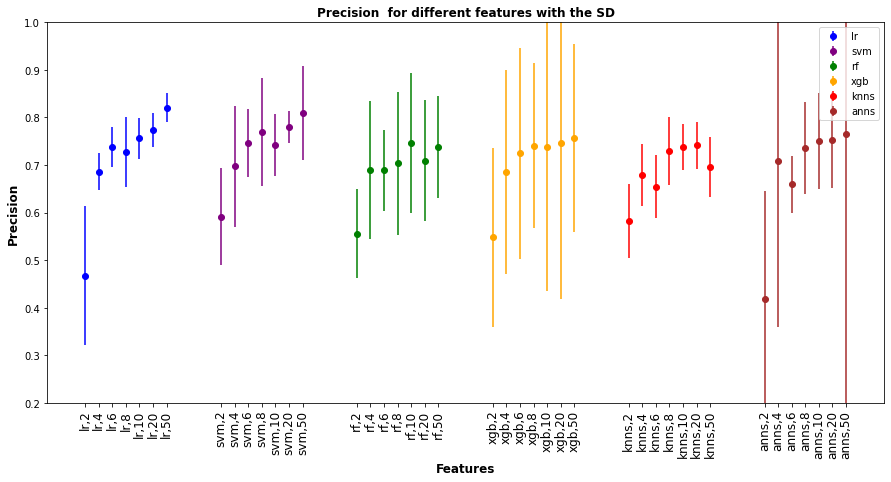

In [12]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,7)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

#### relative perfromance

In [13]:
import json
with open('base.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [14]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr])  

In [15]:
print(arr_diff_all)

[[['lr,2', 'lr,4', 'lr,6', 'lr,8', 'lr,10', 'lr,20', 'lr,50'], [-0.35151515151515156, -0.13213530655391126, -0.0800865800865801, -0.09090909090909094, -0.06236786469344613, -0.044372294372294396, 0.002042900919305368], [0.1508438584060957, 0.04179763031925942, 0.04860622595924242, 0.0794251492641118, 0.04737964493132055, 0.03855168431275188, 0.02978922708495749]], [['svm,2', 'svm,4', 'svm,6', 'svm,8', 'svm,10', 'svm,20', 'svm,50'], [-0.2267839687194526, -0.12050739957716705, -0.07119386637458935, -0.04806687565308265, -0.07660878447395303, -0.037694013303769425, -0.009193054136874435], [0.1072916284862047, 0.1252189334316788, 0.07094923531931667, 0.11121169614560796, 0.06507744368667381, 0.03574387775878901, 0.09982615097149199]], [['rf,2', 'rf,4', 'rf,6', 'rf,8', 'rf,10', 'rf,20', 'rf,50'], [-0.26262626262626265, -0.1289926289926291, -0.1289926289926291, -0.11447811447811451, -0.07151515151515153, -0.10932105868814734, -0.08068181818181819], [0.09890948921437215, 0.15027530222767282, 

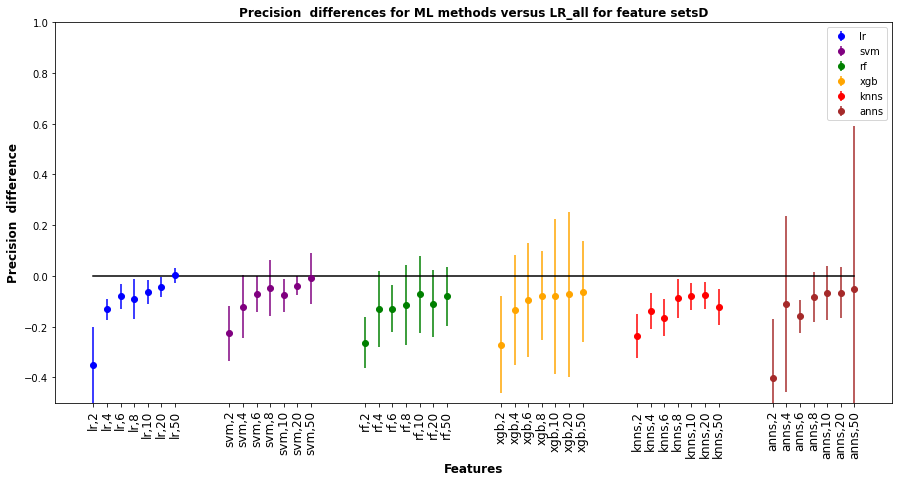

In [20]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,7)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(7*6), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

### now what is next
1. fix the feature key, just make it the num of features
2. change the training from .4 to .3 (across all notebooks)
3. increase the hyperparameters for RF
4. what we can try is the following:
    1. split the data 70, 30
    2. chose an equally spaced features on the following (10, 20, 50, 100) using (how many methods)
    3. the testing has to happen on a validation set
    4. select the optimal number of feature set feature
    5. perform feature importance, and re-order the features according to their importance (consider [FRE](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py))
    6. then perform different ml methods with different number of features
    7. calculate the precision, and the relative precision, where the base model is LR

In [64]:
print(1)

1
